# Lesson 8 - scikit-learn

This lesson we will cover scikit-learn, covering topics from basic model training to advanced techniques.

## 1 Getting Started with scikit-learn

This chapter introduces the basics of scikit-learn, a popular Python library for machine learning. We'll cover:
- Importing scikit-learn and checking its version.
- Building a simple linear regression model.
- Performing classification using the Iris dataset.
- Loading data from a CSV file and using it in a regression task.

### 1.1 Importing scikit-learn and Checking the Version

Before using scikit-learn, we need to import it and verify its version to ensure you’re working with the expected release.

In [1]:
import sklearn
print("scikit-learn version:", sklearn.__version__)

scikit-learn version: 1.6.1


### 1.2 Simple Linear Regression Example

In this example, we generate a synthetic dataset for linear regression using NumPy. We then create and train a `LinearRegression` model from scikit-learn. Finally, we plot the data points along with the regression line.

Intercept: 4.215096157546747
Coefficient: [2.77011339]


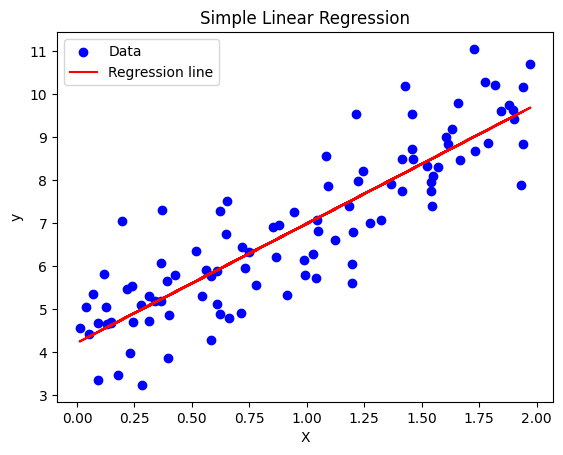

In [2]:
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt


# Generate a simple linear dataset
np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X[:, 0] + np.random.randn(100)

# Ensure X is a 2D array
X = X.reshape(-1, 1)

# Create and fit the linear regression model
lin_reg = LinearRegression()
lin_reg.fit(X, y)

# Make predictions
y_pred = lin_reg.predict(X)

# Print model parameters
print("Intercept:", lin_reg.intercept_)
print("Coefficient:", lin_reg.coef_)

# Plot the results
plt.scatter(X, y, color='blue', label='Data')
plt.plot(X, y_pred, color='red', label='Regression line')
plt.xlabel("X")
plt.ylabel("y")
plt.title("Simple Linear Regression")
plt.legend()
plt.show()


### 1.3 Classification Using the Iris Dataset

We use scikit-learn's built-in Iris dataset to perform a classification task. The dataset is split into training and testing sets, and a K-Nearest Neighbors (KNN) classifier is trained to predict iris species.

In [6]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score


# Load the Iris dataset
iris = load_iris()
X_iris = iris.data
y_iris = iris.target

# Split the data into training and testing sets
X_train_iris, X_test_iris, y_train_iris, y_test_iris = train_test_split(X_iris, y_iris, test_size=0.2, random_state=42)

# Create and train a KNN classifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_iris, y_train_iris)

# Predict and evaluate
y_pred_iris = knn.predict(X_test_iris)
accuracy = accuracy_score(y_test_iris, y_pred_iris)
print("Accuracy on Iris test set:", accuracy)


Accuracy on Iris test set: 1.0


### 1.4 Loading a Dataset from a CSV File

We create an example CSV file representing housing data, then load it into a DataFrame using Pandas. The dataset contains features like `Area` (in square meters), `Bedrooms`, and `Price` (in thousands of dollars). Finally, we use these features to train a linear regression model.

In [8]:
import pandas as pd

# Load housing data from the CSV file
df_housing = pd.read_csv("housing.csv")
print("Housing Data:")
print(df_housing)

# Use 'Area' and 'Bedrooms' to predict 'Price'
X_housing = df_housing[['Area', 'Bedrooms']]
y_housing = df_housing['Price']

# Create and fit a Linear Regression model
housing_reg = LinearRegression()
housing_reg.fit(X_housing, y_housing)

print("\nHousing Model Parameters:")
print("Intercept:", housing_reg.intercept_)
print("Coefficients:", housing_reg.coef_)
print("R^2 score:", housing_reg.score(X_housing, y_housing))

Housing Data:
   Area  Bedrooms  Price
0    50         1    150
1    70         2    200
2    80         2    220
3   120         3    300
4   150         3    350
5   200         4    450

Housing Model Parameters:
Intercept: 51.005434782608575
Coefficients: [ 1.64945652 17.25543478]
R^2 score: 0.9998620914644997


## 2 Data Preprocessing and Model Evaluation

This chapter focuses on essential preprocessing techniques and evaluation strategies in scikit-learn. We'll explore:
- Splitting data into training and test sets.
- Scaling features with StandardScaler.
- Evaluating models using cross-validation.
- Calculating regression metrics.

### 2.1 Splitting Data into Training and Test Sets

Splitting data helps evaluate model performance on unseen data. We use `train_test_split` to divide the housing dataset into training and testing subsets.

In [9]:
from sklearn.model_selection import train_test_split

# Split housing data (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X_housing, y_housing, test_size=0.2, random_state=42)
print("Training set size:", X_train.shape)
print("Test set size:", X_test.shape)

Training set size: (4, 2)
Test set size: (2, 2)


### 2.2 Data Scaling with StandardScaler

Feature scaling standardizes the range of independent variables. We apply `StandardScaler` to our housing features before training our model.

In [10]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Scaled Training Features:")
print(X_train_scaled)

Scaled Training Features:
[[ 1.42682536  1.41421356]
 [-1.31267933 -1.41421356]
 [ 0.28536507  0.        ]
 [-0.3995111   0.        ]]


### 2.3 Model Evaluation with Cross-Validation

Cross-validation provides a robust estimate of model performance. We use 5-fold cross-validation on our housing dataset with a Linear Regression model.

In [13]:
from sklearn.model_selection import cross_val_score

# Perform 5-fold cross-validation on the housing dataset
cv_scores = cross_val_score(LinearRegression(), X_housing, y_housing, cv=3)
print("Cross-validation scores:", cv_scores)
print("Average cross-validation score:", cv_scores.mean())

Cross-validation scores: [0.97756233 0.99652778 0.99972222]
Average cross-validation score: 0.9912707756232689


## 2.4 Evaluating Model Performance Using Metrics

We assess regression model performance using metrics like Mean Squared Error (MSE) and R-squared (R²). These metrics quantify how well our model predicts the housing prices.

In [14]:
from sklearn.metrics import mean_squared_error, r2_score

# Train the regression model on scaled features and predict on the test set
housing_reg.fit(X_train_scaled, y_train)
y_pred_housing = housing_reg.predict(X_test_scaled)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred_housing)
r2 = r2_score(y_test, y_pred_housing)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 14.02354570637024
R-squared: 0.9775623268698076


## 3 Using Pipelines and Grid Search

This chapter delves into advanced scikit-learn techniques such as pipelines, grid search for hyperparameter tuning, ensemble methods, dimensionality reduction, advanced regression, and clustering.

### 3.1 Using Pipelines and Grid Search

Pipelines streamline the process of chaining data preprocessing and model training steps. We create a pipeline that standardizes data and trains a linear regression model, then use `GridSearchCV` to optimize hyperparameters.

In [16]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

# Create a pipeline for scaling and regression
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', LinearRegression())
])

# Parameter grid for GridSearchCV (tuning the fit_intercept parameter)
param_grid = {
    'regressor__fit_intercept': [True, False]
}

grid_search = GridSearchCV(pipeline, param_grid, cv=3)
grid_search.fit(X_housing, y_housing)

print("Best parameters from GridSearchCV:")
print(grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)

Best parameters from GridSearchCV:
{'regressor__fit_intercept': True}
Best cross-validation score: 0.9912707756232688
